In [51]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit_textbook.tools import simon_oracle

C:\Users\pmang\AppData\Local\Temp/ipykernel_12796/88881463.py:11: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  simon_circuit += simon_oracle(b)


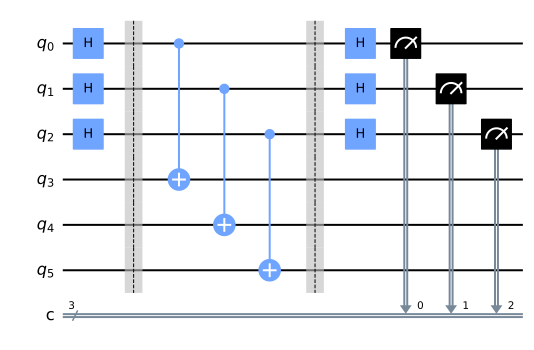

In [81]:
b = '000'

n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit.h(range(n))    
    
# Apply barrier for visual separation
simon_circuit.barrier()
simon_circuit += simon_oracle(b)
#simon_circuit.cx(0,3)
#simon_circuit.cx(1,4)
#simon_circuit.cx(2,5)
#simon_circuit.cx(2,4)
#simon_circuit.cx(2,5)

# Apply barrier for visual separation
simon_circuit.barrier()

# Apply Hadamard gates to the input register
simon_circuit.h(range(n))

# Measure qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

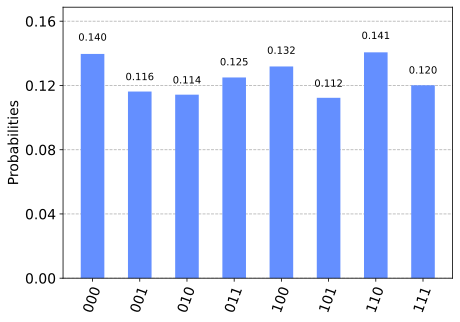

In [82]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

### Histogram의 가로축 비트는 밑으로 갈수록 LSB, 위로 갈수록 MSB
### bra-ket에서 사용되는 비트 표기 순서는 평소와 같음
### 회로도에서는 큐비트 숫자가 작을수록 LSB

In [83]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )


000.111 = 0 (mod 2)
000.010 = 0 (mod 2)
000.000 = 0 (mod 2)
000.001 = 0 (mod 2)
000.101 = 0 (mod 2)
000.011 = 0 (mod 2)
000.100 = 0 (mod 2)
000.110 = 0 (mod 2)


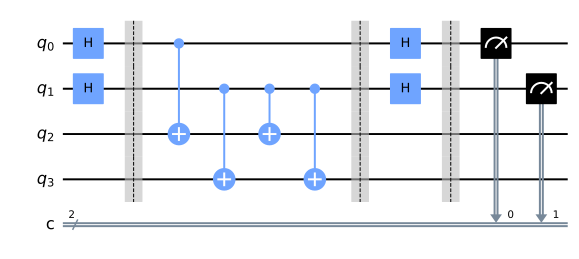

In [59]:
b = '11'
n = len(b)
simon_circuit_2 = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit_2.h(range(n))
simon_circuit_2.barrier()

# Query oracle
simon_circuit_2.cx(0,2)
simon_circuit_2.cx(1,3)
simon_circuit_2.cx(1,2)
simon_circuit_2.cx(1,3)
simon_circuit_2.barrier()

# Apply Hadamard gates to the input register
simon_circuit_2.h(range(n))
simon_circuit_2.barrier()

# Measure qubits
simon_circuit_2.measure(range(n), range(n))
simon_circuit_2.draw()

In [28]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n*2 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Execute and monitor the job
from qiskit.tools.monitor import job_monitor
shots = 1024
transpiled_simon_circuit = transpile(simon_circuit_2, backend, optimization_level=3)
qobj = assemble(transpiled_simon_circuit, shots=shots)
job = backend.run(qobj)
job_monitor(job, interval=2)

ibmqfactory.load_account:WARNING:2022-07-21 17:41:05,233: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_belem


C:\Users\pmang\AppData\Local\Temp/ipykernel_12796/4118413801.py:13: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


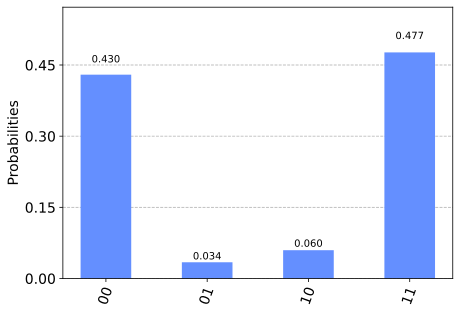

In [29]:
device_counts = job.result().get_counts()
plot_histogram(device_counts)

In [32]:
for z in device_counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )


11.00 = 0 (mod 2)
11.01 = 1 (mod 2)
11.10 = 1 (mod 2)
11.11 = 0 (mod 2)


## b XOR eqaulity

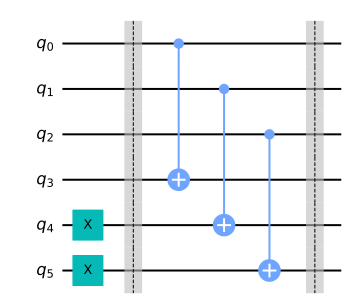

In [47]:
vc1 = QuantumCircuit(6)
vc1.x(4)
vc1.x(5)
vc1.barrier()
vc1.cx(0,3)
vc1.cx(1,4)
vc1.cx(2,5)
vc1.save_unitary()
vc1.draw()

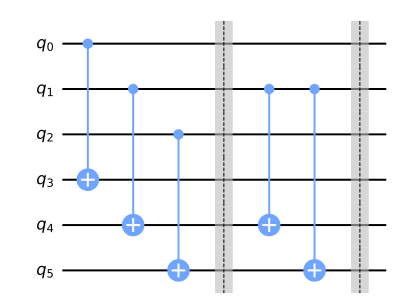

In [54]:
vc2 = QuantumCircuit(6)
vc2.cx(0,3)
vc2.cx(1,4)
vc2.cx(2,5)
vc2.barrier()
vc2.cx(1,4)
vc2.cx(1,5)
vc2.save_unitary()
vc2.draw()

In [55]:
qobj1 = assemble(vc1)
result1 = aer_sim.run(qobj1).result()

qobj2 = assemble(vc2)
result2 = aer_sim.run(qobj2).result()

In [58]:
display(array_to_latex(result1.get_unitary()))

<IPython.core.display.Latex object>

In [56]:
display(array_to_latex(result2.get_unitary()))

<IPython.core.display.Latex object>